In [ ]:
# Computación II - UNIDAD II 
##Calculo de Raices Reales de polinomios
+ Autor: Oscar Ortega
+ Email: oeortega23@gmail.com
+ 19 de marzo, 2022

## Métodos numéricos y exploración ingenua
+ Método bisección
+ Método de Newton-Raphson

+ Método de la exploración ingenua

X [0.00000000e+00 9.09918107e-04 1.81983621e-03 ... 9.98180164e-01
 9.99090082e-01 1.00000000e+00]
The total elapsed time of incremental serch was:  3.704786777496338 secs
Ejecucion del metodo de Newton


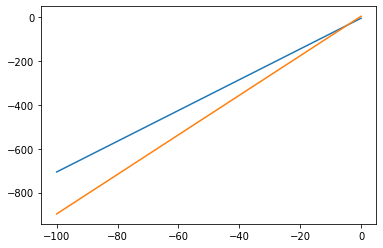

In [1]:


import time 
from sympy import *
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x, y, z



# Metodo grafico

class Graph():

    def graph2DPlot(self, start, end, equation):
        X = np.arange(start, end)
        Y = np.zeros_like(X)
        for i in range(len(X)):
            Y[i] = equation.subs(x, X[i])
        plt.plot(X,Y)



class NumericalMethods():


  def bisectionMethod(self, a, b, tol, maxIter, func):
    error = np.inf
    iter = 0
    c = 0

    while (error > tol) or (iter > maxIter):
      #Evaluar la funcion cuando x = a y x = b 
      fa = func.subs(x,a)
      fb = func.subs(x,b)

      #Verificar si existe un cambio de signo 
      if fa * fb < 0:
        print("Existe un cambio de signo")
        c = (a+b)/2
        fc = func.subs(x,c)

        if fa * fc < 0:
          a = a 
          b = c 
        elif fa * fc > 0:
          a = c 
          b = b 
          #La raíz está en el intervalo [a,c]
        elif fc == 0:
          print("La raiz de: ", func, "Se encuentra en: ", c) 
          break 
          exit(0)
        error = abs(b-a)
        iter = iter + 1
        #print('error: ', error, 'Iteracion: ', iter)
      else:
        print("No existen raices reales en el intervalo")
        break
    print("La raiz de la funcion es: ",  c)
    print("Iteraciones:", iter)



  #Método de Newton-Raphson 

  def NewtonRaphson(self, x0, tol, maxIter, func):
      root = np.inf
      # Calcular derivada de la función original
      firstDer = diff(func, x)

      # Inicializar error e iteraciones
      error = np.inf
      iter = 0
      while (error > tol and iter <= maxIter):
        if firstDer.subs(x,x0) == 0:
          print("Ocurrio una indeterminacion")
          break
        else:
        #Evaluar la funcion cuando x = a y x = b 
          x1 = x0 - (func.subs(x,x0) / firstDer.subs(x,x0))
          error = abs(x1 - x0)
          x0 = x1
          iter += 1
          root = x1
          
      if iter == maxIter:
        print("El método no convergió en:", iter, iteraciones)
      else:
        print("La raíz de la función es: ", float(root))
        print("El número total de iteraciones fue: ", iter)
      return x1



#Metodo de Busqueda Incremental

class NaiveMethods:

    """
        Este método efectua una búsqueda incrementar sobre el intervalo [a,b]
        Entradas: Intervalo [a,b], función
        Salida: Lista con raices reales
    """
    def incrementalSearch(self, a, b, func):
        X = np.linspace(a, b, 1100)
        print("X", X)
        Y = np.zeros_like(X)
        start = time.time()
        for i in range(len(X)):
            if func.subs(x, X[i]) == 0:
                print("The real root is: ", X[i])
        end = time.time()
        print("The total elapsed time of incremental serch was: ", (end-start), "secs")
            

def main():

  x0 = 0
  maxIter = 90000
  tol = 0.0000001
  func = 2*x**2 - 3*x - 5
    
  objN = NaiveMethods()
  objN.incrementalSearch(0, 1, func)

    
  # Definición de intervalo de evaluación
  a = -100
  b = 1

  # Definir 2 ecuaciones, 1 incognita
  #no es util para mas de tres variables
  eq1 = 7*x - 6
  eq2 = 9*x + 3

  # Objeto para crear gráficos
  objG = Graph() 

  # resolver empleando el método gráfico en  2D
  objG.graph2DPlot(a,b, eq1)
  objG.graph2DPlot(a,b, eq2) 

  objNM = NumericalMethods()

  print("Ejecucion del metodo de Newton")  
  x0 = 1000

     


if __name__ == "__main__":
    main()
    

